In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/read.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'test'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 0
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '15m',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['BTC-PERP'],
        'open': {
            '15m': {
                'wt': {
                    'check': ['check_signal_band'],
                    'trigger': 'outer',
                    'channel_range': 10,
                    'average_range': 21,
                    'overbought': 60,
                    'oversold': -60,
                    'revert': False
                }
            },
            '4h': {
                'supertrend': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                }
            }    
            
        },
        'close': {
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 100,
        'price_percent': 5,
        'signal': None,
    },
    'sl': {
        'stop_percent': 100,
        'price_percent': 5,
        'signal': {
            'timeframe': '4h',
            'signal': {
                'supertrend': {
                    'look_back': 1,
                    'atr_range': 10,
                    'multiplier': 3,
                    'revert': False
                }
            }
        }
    },
    'action_percent': 10,
    'leverage': 10,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/2 symbol 1/1 date 1/186
base: timeframe 1/2 symbol 1/1 date 2/186
base: timeframe 1/2 symbol 1/1 date 3/186
base: timeframe 1/2 symbol 1/1 date 4/186
base: timeframe 1/2 symbol 1/1 date 5/186
base: timeframe 1/2 symbol 1/1 date 6/186
base: timeframe 1/2 symbol 1/1 date 7/186
base: timeframe 1/2 symbol 1/1 date 8/186
base: timeframe 1/2 symbol 1/1 date 9/186
base: timeframe 1/2 symbol 1/1 date 10/186
base: timeframe 1/2 symbol 1/1 date 11/186
base: timeframe 1/2 symbol 1/1 date 12/186
base: timeframe 1/2 symbol 1/1 date 13/186
base: timeframe 1/2 symbol 1/1 date 14/186
base: timeframe 1/2 symbol 1/1 date 15/186
base: timeframe 1/2 symbol 1/1 date 16/186
base: timeframe 1/2 symbol 1/1 date 17/186
base: timeframe 1/2 symbol 1/1 date 18/186
base: timeframe 1/2 symbol 1/1 date 19/186
base: timeframe 1/2 symbol 1/1 date 20/186
base: timeframe 1/2 symbol 1/1 date 21/186
base: timeframe 1/2 symbol 1/1 date 22/186
base: timeframe 1/2 symbol 1/1 date 23/186
base: timeframe 1/2 

base: timeframe 2/2 symbol 1/1 date 4/342
base: timeframe 2/2 symbol 1/1 date 5/342
base: timeframe 2/2 symbol 1/1 date 6/342
base: timeframe 2/2 symbol 1/1 date 7/342
base: timeframe 2/2 symbol 1/1 date 8/342
base: timeframe 2/2 symbol 1/1 date 9/342
base: timeframe 2/2 symbol 1/1 date 10/342
base: timeframe 2/2 symbol 1/1 date 11/342
base: timeframe 2/2 symbol 1/1 date 12/342
base: timeframe 2/2 symbol 1/1 date 13/342
base: timeframe 2/2 symbol 1/1 date 14/342
base: timeframe 2/2 symbol 1/1 date 15/342
base: timeframe 2/2 symbol 1/1 date 16/342
base: timeframe 2/2 symbol 1/1 date 17/342
base: timeframe 2/2 symbol 1/1 date 18/342
base: timeframe 2/2 symbol 1/1 date 19/342
base: timeframe 2/2 symbol 1/1 date 20/342
base: timeframe 2/2 symbol 1/1 date 21/342
base: timeframe 2/2 symbol 1/1 date 22/342
base: timeframe 2/2 symbol 1/1 date 23/342
base: timeframe 2/2 symbol 1/1 date 24/342
base: timeframe 2/2 symbol 1/1 date 25/342
base: timeframe 2/2 symbol 1/1 date 26/342
base: timeframe 2

base: timeframe 2/2 symbol 1/1 date 193/342
base: timeframe 2/2 symbol 1/1 date 194/342
base: timeframe 2/2 symbol 1/1 date 195/342
base: timeframe 2/2 symbol 1/1 date 196/342
base: timeframe 2/2 symbol 1/1 date 197/342
base: timeframe 2/2 symbol 1/1 date 198/342
base: timeframe 2/2 symbol 1/1 date 199/342
base: timeframe 2/2 symbol 1/1 date 200/342
base: timeframe 2/2 symbol 1/1 date 201/342
base: timeframe 2/2 symbol 1/1 date 202/342
base: timeframe 2/2 symbol 1/1 date 203/342
base: timeframe 2/2 symbol 1/1 date 204/342
base: timeframe 2/2 symbol 1/1 date 205/342
base: timeframe 2/2 symbol 1/1 date 206/342
base: timeframe 2/2 symbol 1/1 date 207/342
base: timeframe 2/2 symbol 1/1 date 208/342
base: timeframe 2/2 symbol 1/1 date 209/342
base: timeframe 2/2 symbol 1/1 date 210/342
base: timeframe 2/2 symbol 1/1 date 211/342
base: timeframe 2/2 symbol 1/1 date 212/342
base: timeframe 2/2 symbol 1/1 date 213/342
base: timeframe 2/2 symbol 1/1 date 214/342
base: timeframe 2/2 symbol 1/1 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add wt to BTC-PERP 15m
base add supertrend to BTC-PERP 4h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 00:15:00: progress 1/16800
  BTC-PERP
     Not available data
Time 2022-01-01 00:30:00: progress 2/16800
  BTC-PERP
     Not available data
Time 2022-01-01 00:45:00: progress 3/16800
  BTC-PERP
     Not available data
Time 2022-01-01 01:00:00: progress 4/16800
  BTC-PERP
     Not available data
Time 2022-01-01 01:15:00: progress 5/16800
  BTC-PERP
     Not available data
Time 2022-01-01 01:30:00: progress 6/16800
  BTC-PERP
     Not available data
Time 2022-01-01 01:45:00: progress 7/16800
  BTC-PERP
     Not available data
Time 2022-01-01 02:00:00: progress 8/16800
  BTC-PERP
     Not available data
Time 2022-01-01 02:15:00: progress 9/16800
  BTC-PERP
     Not available data
Time 2022-01-01 02:30:00: progress 10/16800
  BTC-PERP
     Not available data
Time 2022-01-01 02:45:00: progress 11/16800
  BTC-PERP
     Not available data
Time 2022-01-01 03:00:00: progress 12/16800
  BTC-PERP
     Not available data
Time 2022-01-01 03:15:00: progress 13/16800
  BTC-PERP
     b

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-02 01:45:00: progress 103/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-02 02:00:00: progress 104/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-02 02:15:00: progress 105/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-02 02:30:00: progress 106/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-02 02:45:00: progress 107/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     No action
Time 2022-01-03 15:30:00: progress 254/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-03 15:45:00: progress 255/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-03 16:00:00: progress 256/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-03 16:15:00: progress 257/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-03 16:30:00: progress 258/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-03 16:45:00: progress 259/16800
  BTC-PERP
     base BTC-

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-04 06:30:00: progress 314/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-04 06:45:00: progress 315/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-04 07:00:00: progress 316/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-04 07:15:00: progress 317/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-04 07:30:00: progress 318/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

       side: sell
       price: 46383.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 00:00:00: progress 480/16800
  BTC-PERP
       side: sell
       price: 46281.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 00:15:00: progress 481/16800
  BTC-PERP
       side: sell
       price: 46293.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 00:30:00: progress 482/16800
  BTC-PERP
       side: sell
       price: 46250.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 00:45:00: progress 483/16800
  BTC-PERP
       side: sell
       price: 46076.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 01:00:00: progress 484/16800
  BTC-PERP
       side: sell
       price: 45957.0
       sl: 48388.04895785817
       sl_flag: False
     Not close
Time 2022-01-06 01:15:00: progress 485/16800
  BTC-PERP
       side: sell
       pri

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-08 03:15:00: progress 685/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-08 03:30:00: progress 686/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-08 03:45:00: progress 687/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-08 04:00:00: progress 688/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-08 04:15:00: progress 689/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-10 03:00:00: progress 876/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-10 03:15:00: progress 877/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     sell: 0.002579971290002816
     price: 42622.0
     tp: 40490.9
     sl: 43954.22952128717
Time 2022-01-10 03:30:00: progress 878/16800
  BTC-PERP
       side: sell
       price: 42495.0
       sl: 43954.22952128717
       sl_flag: False
     Not close
Time 2022-01-10 03:45:00: progress 879/16800
  BTC-PERP
       side: sell
       price: 42400.0
       sl: 43954.22952128717
       sl_flag: False
     Not close
Time 2022-01-10 04:00:00: progress 880/16800
  BTC-PERP
       side: sell
       price: 42388.0
       sl: 

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 05:15:00: progress 1077/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 05:30:00: progress 1078/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 05:45:00: progress 1079/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 06:00:00: progress 1080/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 06:15:00: progress 1081/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 16:45:00: progress 1123/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 17:00:00: progress 1124/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 17:15:00: progress 1125/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 17:30:00: progress 1126/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-12 17:45:00: progress 1127/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-14 13:45:00: progress 1303/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-14 14:00:00: progress 1304/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-14 14:15:00: progress 1305/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-14 14:30:00: progress 1306/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-14 14:45:00: progress 1307/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-1

Time 2022-01-16 14:15:00: progress 1497/16800
  BTC-PERP
       side: buy
       price: 43185.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 14:30:00: progress 1498/16800
  BTC-PERP
       side: buy
       price: 43143.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 14:45:00: progress 1499/16800
  BTC-PERP
       side: buy
       price: 43140.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 15:00:00: progress 1500/16800
  BTC-PERP
       side: buy
       price: 43219.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 15:15:00: progress 1501/16800
  BTC-PERP
       side: buy
       price: 43224.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 15:30:00: progress 1502/16800
  BTC-PERP
       side: buy
       price: 43183.0
       sl: 41535.94789003004
       sl_flag: False
     Not close
Time 2022-01-16 15:45:00: pr

  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-18 16:45:00: progress 1699/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-18 17:00:00: progress 1700/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-18 17:15:00: progress 1701/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-18 17:30:00: progress 1702/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-18 17:45:00: progress 1703/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP 

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-20 13:00:00: progress 1876/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-20 13:15:00: progress 1877/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-20 13:30:00: progress 1878/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-20 13:45:00: progress 1879/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-20 14:00:00: progress 1880/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     sell: 0.002577772597537112
     price: 43213.0
     tp: 41052.35
     sl: 43333.4993325956
Time 2022-01-21 00:00:00: progress 1920/16800
  BTC-PERP
       side: sell
       price: 43207.0
       sl: 43333.4993325956
       sl_flag: True
     Stop loss at 43333.4993325956
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     sell: 0.0025618129178685946
     price: 43300.0
     tp: 41135.0
     sl: 43333.4993325956
Time 2022-01-21 00:15:00: progress 1921/16800
  BTC-PERP
       side: sell
       price: 43195.0
       sl: 43333.4993325956
       sl_flag: False
     Not close
Time 2022-01-21 00:30:00: progress 1922/16800
  BTC-PERP
       side: sell
       price: 43164.0
       sl: 43333.4993325956
       sl_flag: False
     Not close
Time 2022-01-21 00:45:00: progress 1923/16800
  BTC-PERP
       side: sell
       price: 43113.0
       sl: 43333.4993325956
       sl_flag: False
     Not close
Time 2022-01-21 01:00:0

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-22 19:45:00: progress 2095/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-22 20:00:00: progress 2096/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-22 20:15:00: progress 2097/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-22 20:30:00: progress 2098/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-22 20:45:00: progress 2099/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-24 20:30:00: progress 2290/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-24 20:45:00: progress 2291/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-24 21:00:00: progress 2292/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-24 21:15:00: progress 2293/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-24 21:30:00: progress 2294/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-01-2

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-26 19:45:00: progress 2479/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-26 20:00:00: progress 2480/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-26 20:15:00: progress 2481/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-26 20:30:00: progress 2482/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-26 20:45:00: progress 2483/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

       side: buy
       price: 36427.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 17:00:00: progress 2660/16800
  BTC-PERP
       side: buy
       price: 36485.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 17:15:00: progress 2661/16800
  BTC-PERP
       side: buy
       price: 36340.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 17:30:00: progress 2662/16800
  BTC-PERP
       side: buy
       price: 36476.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 17:45:00: progress 2663/16800
  BTC-PERP
       side: buy
       price: 36560.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 18:00:00: progress 2664/16800
  BTC-PERP
       side: buy
       price: 36523.0
       sl: 34738.47214230678
       sl_flag: False
     Not close
Time 2022-01-28 18:15:00: progress 2665/16800
  BTC-PERP
       side: buy
       pric

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 01:15:00: progress 2885/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 01:30:00: progress 2886/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 01:45:00: progress 2887/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 02:00:00: progress 2888/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 02:15:00: progress 2889/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 13:45:00: progress 2935/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 14:00:00: progress 2936/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 14:15:00: progress 2937/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 14:30:00: progress 2938/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-01-31 14:45:00: progress 2939/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-02 08:15:00: progress 3105/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-02 08:30:00: progress 3106/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-02 08:45:00: progress 3107/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-02 09:00:00: progress 3108/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-02 09:15:00: progress 3109/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-04 07:30:00: progress 3294/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-04 07:45:00: progress 3295/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-04 08:00:00: progress 3296/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-04 08:15:00: progress 3297/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-04 08:30:00: progress 3298/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-0

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-06 13:45:00: progress 3511/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-06 14:00:00: progress 3512/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-06 14:15:00: progress 3513/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-06 14:30:00: progress 3514/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-06 14:45:00: progress 3515/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-07 01:30:00: progress 3558/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-07 01:45:00: progress 3559/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-07 02:00:00: progress 3560/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-07 02:15:00: progress 3561/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-07 02:30:00: progress 3562/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-08 21:15:00: progress 3733/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-08 21:30:00: progress 3734/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-08 21:45:00: progress 3735/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-08 22:00:00: progress 3736/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-08 22:15:00: progress 3737/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-10 21:00:00: progress 3924/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-10 21:15:00: progress 3925/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-10 21:30:00: progress 3926/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-10 21:45:00: progress 3927/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-10 22:00:00: progress 3928/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-12 21:30:00: progress 4118/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-12 21:45:00: progress 4119/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-12 22:00:00: progress 4120/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-12 22:15:00: progress 4121/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-12 22:30:00: progress 4122/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-14 22:45:00: progress 4315/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-14 23:00:00: progress 4316/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-14 23:15:00: progress 4317/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-14 23:30:00: progress 4318/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-14 23:45:00: progress 4319/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

       side: sell
       price: 43591.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 10:45:00: progress 4363/16800
  BTC-PERP
       side: sell
       price: 43608.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 11:00:00: progress 4364/16800
  BTC-PERP
       side: sell
       price: 43577.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 11:15:00: progress 4365/16800
  BTC-PERP
       side: sell
       price: 43530.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 11:30:00: progress 4366/16800
  BTC-PERP
       side: sell
       price: 43529.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 11:45:00: progress 4367/16800
  BTC-PERP
       side: sell
       price: 43506.0
       sl: 44094.67148383278
       sl_flag: False
     Not close
Time 2022-02-15 12:00:00: progress 4368/16800
  BTC-PERP
       side: sell
    

Time 2022-02-17 09:30:00: progress 4550/16800
  BTC-PERP
       side: buy
       price: 43854.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 09:45:00: progress 4551/16800
  BTC-PERP
       side: buy
       price: 43877.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 10:00:00: progress 4552/16800
  BTC-PERP
       side: buy
       price: 43960.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 10:15:00: progress 4553/16800
  BTC-PERP
       side: buy
       price: 43975.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 10:30:00: progress 4554/16800
  BTC-PERP
       side: buy
       price: 43936.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 10:45:00: progress 4555/16800
  BTC-PERP
       side: buy
       price: 43752.0
       sl: 42192.031185772044
       sl_flag: False
     Not close
Time 2022-02-17 11:00:

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-19 10:45:00: progress 4747/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-19 11:00:00: progress 4748/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-19 11:15:00: progress 4749/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-19 11:30:00: progress 4750/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-19 11:45:00: progress 4751/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

       side: sell
       price: 39942.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-19 23:15:00: progress 4797/16800
  BTC-PERP
       side: sell
       price: 39949.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-19 23:30:00: progress 4798/16800
  BTC-PERP
       side: sell
       price: 40168.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-19 23:45:00: progress 4799/16800
  BTC-PERP
       side: sell
       price: 40173.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-20 00:00:00: progress 4800/16800
  BTC-PERP
       side: sell
       price: 39868.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-20 00:15:00: progress 4801/16800
  BTC-PERP
       side: sell
       price: 39898.0
       sl: 42048.70232442731
       sl_flag: False
     Not close
Time 2022-02-20 00:30:00: progress 4802/16800
  BTC-PERP
       side: sell
    

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-21 09:30:00: progress 4934/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-21 09:45:00: progress 4935/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-21 10:00:00: progress 4936/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-21 10:15:00: progress 4937/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-02-21 10:30:00: progress 4938/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

       side: sell
       price: 38774.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 17:00:00: progress 5156/16800
  BTC-PERP
       side: sell
       price: 38778.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 17:15:00: progress 5157/16800
  BTC-PERP
       side: sell
       price: 38787.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 17:30:00: progress 5158/16800
  BTC-PERP
       side: sell
       price: 38800.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 17:45:00: progress 5159/16800
  BTC-PERP
       side: sell
       price: 38868.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 18:00:00: progress 5160/16800
  BTC-PERP
       side: sell
       price: 38842.0
       sl: 39606.0
       sl_flag: False
     Not close
Time 2022-02-23 18:15:00: progress 5161/16800
  BTC-PERP
       side: sell
       price: 38773.0
       sl: 39606.0
       sl_flag: False
 

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 12:30:00: progress 5330/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 12:45:00: progress 5331/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 13:00:00: progress 5332/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 13:15:00: progress 5333/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 13:30:00: progress 5334/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-25 23:45:00: progress 5375/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-26 00:00:00: progress 5376/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-26 00:15:00: progress 5377/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-26 00:30:00: progress 5378/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-26 00:45:00: progress 5379/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-27 07:45:00: progress 5503/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-27 08:00:00: progress 5504/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-27 08:15:00: progress 5505/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-27 08:30:00: progress 5506/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-02-27 08:45:00: progress 5507/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-01 14:00:00: progress 5720/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-01 14:15:00: progress 5721/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-01 14:30:00: progress 5722/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-01 14:45:00: progress 5723/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-01 15:00:00: progress 5724/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-02 03:30:00: progress 5774/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-02 03:45:00: progress 5775/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-02 04:00:00: progress 5776/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-02 04:15:00: progress 5777/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-02 04:30:00: progress 5778/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

Time 2022-03-03 14:30:00: progress 5914/16800
  BTC-PERP
       side: buy
       price: 43396.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 14:45:00: progress 5915/16800
  BTC-PERP
       side: buy
       price: 43427.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 15:00:00: progress 5916/16800
  BTC-PERP
       side: buy
       price: 43364.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 15:15:00: progress 5917/16800
  BTC-PERP
       side: buy
       price: 43455.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 15:30:00: progress 5918/16800
  BTC-PERP
       side: buy
       price: 43467.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 15:45:00: progress 5919/16800
  BTC-PERP
       side: buy
       price: 43290.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-03 16:00:00: progress 5920/16800
  BTC-PERP
       side: buy
       p

       side: buy
       price: 42517.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 06:45:00: progress 5979/16800
  BTC-PERP
       side: buy
       price: 42428.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 07:00:00: progress 5980/16800
  BTC-PERP
       side: buy
       price: 42432.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 07:15:00: progress 5981/16800
  BTC-PERP
       side: buy
       price: 42252.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 07:30:00: progress 5982/16800
  BTC-PERP
       side: buy
       price: 42114.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 07:45:00: progress 5983/16800
  BTC-PERP
       side: buy
       price: 42104.0
       sl: 41259.45
       sl_flag: False
     Not close
Time 2022-03-04 08:00:00: progress 5984/16800
  BTC-PERP
       side: buy
       price: 41500.0
       sl: 41259.45
       sl_flag: False
 

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 10:45:00: progress 6091/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 11:00:00: progress 6092/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 11:15:00: progress 6093/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 11:30:00: progress 6094/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 11:45:00: progress 6095/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-05 23:45:00: progress 6143/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-06 00:00:00: progress 6144/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-06 00:15:00: progress 6145/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-06 00:30:00: progress 6146/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: sell
     base BTC-PERP check_signal_side supertrend 4h: sell
     sell: 0.003323969136876394
     price: 39446.0
     tp: 37473.7
     sl: 41418.3
Time 2022-03-06 00:45:00: progress 6147/16800
  BTC-PERP
       side: sell
       price: 39407.0
       sl: 41418.3
       sl_

       side: sell
       price: 38591.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 20:00:00: progress 6320/16800
  BTC-PERP
       side: sell
       price: 38550.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 20:15:00: progress 6321/16800
  BTC-PERP
       side: sell
       price: 38536.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 20:30:00: progress 6322/16800
  BTC-PERP
       side: sell
       price: 38640.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 20:45:00: progress 6323/16800
  BTC-PERP
       side: sell
       price: 38643.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 21:00:00: progress 6324/16800
  BTC-PERP
       side: sell
       price: 38952.0
       sl: 40511.483695445284
       sl_flag: False
     Not close
Time 2022-03-07 21:15:00: progress 6325/16800
  BTC-PERP
       side: sel

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-08 08:15:00: progress 6369/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-08 08:30:00: progress 6370/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-08 08:45:00: progress 6371/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-08 09:00:00: progress 6372/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-08 09:15:00: progress 6373/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-09 19:00:00: progress 6508/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-09 19:15:00: progress 6509/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-09 19:30:00: progress 6510/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-09 19:45:00: progress 6511/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-09 20:00:00: progress 6512/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-11 15:30:00: progress 6686/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-11 15:45:00: progress 6687/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-11 16:00:00: progress 6688/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-11 16:15:00: progress 6689/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-03-11 16:30:00: progress 6690/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 202

       side: sell
       price: 38851.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 05:30:00: progress 6742/16800
  BTC-PERP
       side: sell
       price: 38853.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 05:45:00: progress 6743/16800
  BTC-PERP
       side: sell
       price: 38873.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 06:00:00: progress 6744/16800
  BTC-PERP
       side: sell
       price: 38874.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 06:15:00: progress 6745/16800
  BTC-PERP
       side: sell
       price: 38806.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 06:30:00: progress 6746/16800
  BTC-PERP
       side: sell
       price: 38786.0
       sl: 41896.42138319643
       sl_flag: False
     Not close
Time 2022-03-12 06:45:00: progress 6747/16800
  BTC-PERP
       side: sell
    

     Not close
Time 2022-03-13 23:15:00: progress 6909/16800
  BTC-PERP
       side: sell
       price: 38909.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 2022-03-13 23:30:00: progress 6910/16800
  BTC-PERP
       side: sell
       price: 38868.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 2022-03-13 23:45:00: progress 6911/16800
  BTC-PERP
       side: sell
       price: 38922.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 2022-03-14 00:00:00: progress 6912/16800
  BTC-PERP
       side: sell
       price: 38913.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 2022-03-14 00:15:00: progress 6913/16800
  BTC-PERP
       side: sell
       price: 38872.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 2022-03-14 00:30:00: progress 6914/16800
  BTC-PERP
       side: sell
       price: 38921.0
       sl: 40849.45269351212
       sl_flag: False
     Not close
Time 20

       side: sell
       price: 39208.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 01:45:00: progress 7111/16800
  BTC-PERP
       side: sell
       price: 39212.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 02:00:00: progress 7112/16800
  BTC-PERP
       side: sell
       price: 39224.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 02:15:00: progress 7113/16800
  BTC-PERP
       side: sell
       price: 39414.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 02:30:00: progress 7114/16800
  BTC-PERP
       side: sell
       price: 39600.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 02:45:00: progress 7115/16800
  BTC-PERP
       side: sell
       price: 39701.0
       sl: 40139.855513570335
       sl_flag: False
     Not close
Time 2022-03-16 03:00:00: progress 7116/16800
  BTC-PERP
       side: sel

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-17 20:30:00: progress 7282/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-17 20:45:00: progress 7283/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-17 21:00:00: progress 7284/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-17 21:15:00: progress 7285/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-17 21:30:00: progress 7286/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-19 22:00:00: progress 7480/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-19 22:15:00: progress 7481/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-19 22:30:00: progress 7482/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-19 22:45:00: progress 7483/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-19 23:00:00: progress 7484/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

       side: buy
       price: 41136.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 03:30:00: progress 7694/16800
  BTC-PERP
       side: buy
       price: 41140.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 03:45:00: progress 7695/16800
  BTC-PERP
       side: buy
       price: 41154.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 04:00:00: progress 7696/16800
  BTC-PERP
       side: buy
       price: 41138.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 04:15:00: progress 7697/16800
  BTC-PERP
       side: buy
       price: 41081.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 04:30:00: progress 7698/16800
  BTC-PERP
       side: buy
       price: 41117.0
       sl: 40223.15408363176
       sl_flag: False
     Not close
Time 2022-03-22 04:45:00: progress 7699/16800
  BTC-PERP
       side: buy
       pric

       side: buy
       price: 42477.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 17:15:00: progress 7749/16800
  BTC-PERP
       side: buy
       price: 42472.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 17:30:00: progress 7750/16800
  BTC-PERP
       side: buy
       price: 42575.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 17:45:00: progress 7751/16800
  BTC-PERP
       side: buy
       price: 42711.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 18:00:00: progress 7752/16800
  BTC-PERP
       side: buy
       price: 42808.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 18:15:00: progress 7753/16800
  BTC-PERP
       side: buy
       price: 42789.0
       sl: 40467.91209449744
       sl_flag: False
     Not close
Time 2022-03-22 18:30:00: progress 7754/16800
  BTC-PERP
       side: buy
       pric

     Not close
Time 2022-03-24 05:45:00: progress 7895/16800
  BTC-PERP
       side: buy
       price: 42439.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-24 06:00:00: progress 7896/16800
  BTC-PERP
       side: buy
       price: 42462.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-24 06:15:00: progress 7897/16800
  BTC-PERP
       side: buy
       price: 42440.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-24 06:30:00: progress 7898/16800
  BTC-PERP
       side: buy
       price: 42417.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-24 06:45:00: progress 7899/16800
  BTC-PERP
       side: buy
       price: 42532.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-24 07:00:00: progress 7900/16800
  BTC-PERP
       side: buy
       price: 42747.0
       sl: 40624.56379654293
       sl_flag: False
     Not close
Time 2022-03-

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-26 00:15:00: progress 8065/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-26 00:30:00: progress 8066/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-26 00:45:00: progress 8067/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-26 01:00:00: progress 8068/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-26 01:15:00: progress 8069/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-28 09:30:00: progress 8294/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-28 09:45:00: progress 8295/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-28 10:00:00: progress 8296/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-28 10:15:00: progress 8297/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-28 10:30:00: progress 8298/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-30 04:00:00: progress 8464/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-30 04:15:00: progress 8465/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-30 04:30:00: progress 8466/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-30 04:45:00: progress 8467/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-03-30 05:00:00: progress 8468/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signa

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-01 05:45:00: progress 8663/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-01 06:00:00: progress 8664/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-01 06:15:00: progress 8665/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-01 06:30:00: progress 8666/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-01 06:45:00: progress 8667/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-02 23:00:00: progress 8828/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-02 23:15:00: progress 8829/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-02 23:30:00: progress 8830/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-02 23:45:00: progress 8831/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-03 00:00:00: progress 8832/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

       side: sell
       price: 46649.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 06:45:00: progress 9051/16800
  BTC-PERP
       side: sell
       price: 46603.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 07:00:00: progress 9052/16800
  BTC-PERP
       side: sell
       price: 46576.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 07:15:00: progress 9053/16800
  BTC-PERP
       side: sell
       price: 46526.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 07:30:00: progress 9054/16800
  BTC-PERP
       side: sell
       price: 46600.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 07:45:00: progress 9055/16800
  BTC-PERP
       side: sell
       price: 46449.0
       sl: 47078.74739494732
       sl_flag: False
     Not close
Time 2022-04-05 08:00:00: progress 9056/16800
  BTC-PERP
       side: sell
    

     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-06 23:15:00: progress 9213/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-06 23:30:00: progress 9214/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-06 23:45:00: progress 9215/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-07 00:00:00: progress 9216/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-07 00:15:00: progress 9217/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
    

     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-09 00:30:00: progress 9410/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-09 00:45:00: progress 9411/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-09 01:00:00: progress 9412/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-09 01:15:00: progress 9413/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-09 01:30:00: progress 9414/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 202

     sell: 0.00338357537293482
     price: 43045.0
     tp: 40892.75
     sl: 44092.97768737687
Time 2022-04-11 00:45:00: progress 9603/16800
  BTC-PERP
       side: sell
       price: 42981.0
       sl: 44092.97768737687
       sl_flag: False
     Not close
Time 2022-04-11 01:00:00: progress 9604/16800
  BTC-PERP
       side: sell
       price: 42964.0
       sl: 44092.97768737687
       sl_flag: False
     Not close
Time 2022-04-11 01:15:00: progress 9605/16800
  BTC-PERP
       side: sell
       price: 43082.0
       sl: 44092.97768737687
       sl_flag: False
     Not close
Time 2022-04-11 01:30:00: progress 9606/16800
  BTC-PERP
       side: sell
       price: 43156.0
       sl: 44092.97768737687
       sl_flag: False
     Not close
Time 2022-04-11 01:45:00: progress 9607/16800
  BTC-PERP
       side: sell
       price: 43128.0
       sl: 44092.97768737687
       sl_flag: False
     Not close
Time 2022-04-11 02:00:00: progress 9608/16800
  BTC-PERP
       side: sell
       price: 

       side: sell
       price: 40018.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 07:15:00: progress 9821/16800
  BTC-PERP
       side: sell
       price: 39988.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 07:30:00: progress 9822/16800
  BTC-PERP
       side: sell
       price: 40060.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 07:45:00: progress 9823/16800
  BTC-PERP
       side: sell
       price: 40017.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 08:00:00: progress 9824/16800
  BTC-PERP
       side: sell
       price: 39878.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 08:15:00: progress 9825/16800
  BTC-PERP
       side: sell
       price: 39708.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-13 08:30:00: progress 9826/16800
  BTC-PERP
       side: sell
    

       side: sell
       price: 39883.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 07:15:00: progress 10013/16800
  BTC-PERP
       side: sell
       price: 39864.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 07:30:00: progress 10014/16800
  BTC-PERP
       side: sell
       price: 39931.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 07:45:00: progress 10015/16800
  BTC-PERP
       side: sell
       price: 39801.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 08:00:00: progress 10016/16800
  BTC-PERP
       side: sell
       price: 39755.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 08:15:00: progress 10017/16800
  BTC-PERP
       side: sell
       price: 39829.0
       sl: 41754.83112620017
       sl_flag: False
     Not close
Time 2022-04-15 08:30:00: progress 10018/16800
  BTC-PERP
       side: sel

Time 2022-04-17 08:30:00: progress 10210/16800
  BTC-PERP
       side: sell
       price: 40331.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-04-17 08:45:00: progress 10211/16800
  BTC-PERP
       side: sell
       price: 40371.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-04-17 09:00:00: progress 10212/16800
  BTC-PERP
       side: sell
       price: 40393.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-04-17 09:15:00: progress 10213/16800
  BTC-PERP
       side: sell
       price: 40356.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-04-17 09:30:00: progress 10214/16800
  BTC-PERP
       side: sell
       price: 40256.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-04-17 09:45:00: progress 10215/16800
  BTC-PERP
       side: sell
       price: 40166.0
       sl: 41589.719197727165
       sl_flag: False
     Not close
Time 2022-

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-19 04:45:00: progress 10387/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-19 05:00:00: progress 10388/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-19 05:15:00: progress 10389/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-19 05:30:00: progress 10390/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-19 05:45:00: progress 10391/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-21 08:00:00: progress 10592/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-21 08:15:00: progress 10593/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-21 08:30:00: progress 10594/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-21 08:45:00: progress 10595/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-04-21 09:00:00: progress 10596/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-23 04:15:00: progress 10769/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-23 04:30:00: progress 10770/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-23 04:45:00: progress 10771/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-23 05:00:00: progress 10772/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-23 05:15:00: progress 10773/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

  BTC-PERP
       side: sell
       price: 38920.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 08:00:00: progress 10976/16800
  BTC-PERP
       side: sell
       price: 38679.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 08:15:00: progress 10977/16800
  BTC-PERP
       side: sell
       price: 38762.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 08:30:00: progress 10978/16800
  BTC-PERP
       side: sell
       price: 38867.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 08:45:00: progress 10979/16800
  BTC-PERP
       side: sell
       price: 38927.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 09:00:00: progress 10980/16800
  BTC-PERP
       side: sell
       price: 38989.0
       sl: 40780.36719168367
       sl_flag: False
     Not close
Time 2022-04-25 09:15:00: progress 10981/16800
  BTC-PERP
     

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-26 19:45:00: progress 11119/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-26 20:00:00: progress 11120/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-26 20:15:00: progress 11121/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-26 20:30:00: progress 11122/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-04-26 20:45:00: progress 11123/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

       side: sell
       price: 39519.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-28 23:00:00: progress 11324/16800
  BTC-PERP
       side: sell
       price: 39083.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-28 23:15:00: progress 11325/16800
  BTC-PERP
       side: sell
       price: 39320.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-28 23:30:00: progress 11326/16800
  BTC-PERP
       side: sell
       price: 39442.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-28 23:45:00: progress 11327/16800
  BTC-PERP
       side: sell
       price: 39615.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-29 00:00:00: progress 11328/16800
  BTC-PERP
       side: sell
       price: 39766.0
       sl: 40479.33079398789
       sl_flag: False
     Not close
Time 2022-04-29 00:15:00: progress 11329/16800
  BTC-PERP
       side: sel

       price: 38520.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 21:00:00: progress 11508/16800
  BTC-PERP
       side: sell
       price: 38506.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 21:15:00: progress 11509/16800
  BTC-PERP
       side: sell
       price: 38408.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 21:30:00: progress 11510/16800
  BTC-PERP
       side: sell
       price: 38320.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 21:45:00: progress 11511/16800
  BTC-PERP
       side: sell
       price: 38326.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 22:00:00: progress 11512/16800
  BTC-PERP
       side: sell
       price: 38210.0
       sl: 40167.758718804944
       sl_flag: False
     Not close
Time 2022-04-30 22:15:00: progress 11513/16800
  BTC-PERP
       side: sell
       pri

       side: sell
       price: 38558.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-02 23:30:00: progress 11710/16800
  BTC-PERP
       side: sell
       price: 38667.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-02 23:45:00: progress 11711/16800
  BTC-PERP
       side: sell
       price: 38708.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-03 00:00:00: progress 11712/16800
  BTC-PERP
       side: sell
       price: 38522.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-03 00:15:00: progress 11713/16800
  BTC-PERP
       side: sell
       price: 38411.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-03 00:30:00: progress 11714/16800
  BTC-PERP
       side: sell
       price: 38357.0
       sl: 39567.627106008804
       sl_flag: False
     Not close
Time 2022-05-03 00:45:00: progress 11715/16800
  BTC-PERP
       sid

       side: sell
       price: 38866.0
       sl: 39517.57155090719
       sl_flag: False
     Not close
     Update sl: 37572.74277754048
Time 2022-05-04 23:30:00: progress 11902/16800
  BTC-PERP
       side: sell
       price: 38962.0
       sl: 37572.74277754048
       sl_flag: True
     Stop loss at 37572.74277754048
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-04 23:45:00: progress 11903/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-05 00:00:00: progress 11904/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-05 00:15:00: progress 11905/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
  

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-06 16:30:00: progress 12066/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-06 16:45:00: progress 12067/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-06 17:00:00: progress 12068/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-06 17:15:00: progress 12069/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-06 17:30:00: progress 12070/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-08 11:00:00: progress 12236/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-08 11:15:00: progress 12237/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-08 11:30:00: progress 12238/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-08 11:45:00: progress 12239/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-08 12:00:00: progress 12240/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side s

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-10 10:15:00: progress 12425/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-10 10:30:00: progress 12426/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-10 10:45:00: progress 12427/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-10 11:00:00: progress 12428/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-10 11:15:00: progress 12429/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-12 04:30:00: progress 12594/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-12 04:45:00: progress 12595/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-12 05:00:00: progress 12596/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-12 05:15:00: progress 12597/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-12 05:30:00: progress 12598/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertr

       price: 29346.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 08:00:00: progress 12800/16800
  BTC-PERP
       side: sell
       price: 29409.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 08:15:00: progress 12801/16800
  BTC-PERP
       side: sell
       price: 29322.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 08:30:00: progress 12802/16800
  BTC-PERP
       side: sell
       price: 29470.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 08:45:00: progress 12803/16800
  BTC-PERP
       side: sell
       price: 29580.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 09:00:00: progress 12804/16800
  BTC-PERP
       side: sell
       price: 29614.0
       sl: 31468.5
       sl_flag: False
     Not close
Time 2022-05-14 09:15:00: progress 12805/16800
  BTC-PERP
       side: sell
       price: 29600.0
       sl: 31468.5
       sl_flag: False
     Not clos

       side: sell
       price: 31016.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 07:45:00: progress 12991/16800
  BTC-PERP
       side: sell
       price: 31035.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 08:00:00: progress 12992/16800
  BTC-PERP
       side: sell
       price: 31030.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 08:15:00: progress 12993/16800
  BTC-PERP
       side: sell
       price: 30880.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 08:30:00: progress 12994/16800
  BTC-PERP
       side: sell
       price: 30864.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 08:45:00: progress 12995/16800
  BTC-PERP
       side: sell
       price: 30677.0
       sl: 32048.386711181418
       sl_flag: False
     Not close
Time 2022-05-16 09:00:00: progress 12996/16800
  BTC-PERP
       sid

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-17 15:00:00: progress 13116/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-17 15:15:00: progress 13117/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-17 15:30:00: progress 13118/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-17 15:45:00: progress 13119/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-17 16:00:00: progress 13120/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: sell
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-19 18:45:00: progress 13323/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-19 19:00:00: progress 13324/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-19 19:15:00: progress 13325/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-19 19:30:00: progress 13326/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-19 19:45:00: progress 13327/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

       side: sell
       price: 29326.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 22:15:00: progress 13529/16800
  BTC-PERP
       side: sell
       price: 29245.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 22:30:00: progress 13530/16800
  BTC-PERP
       side: sell
       price: 29263.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 22:45:00: progress 13531/16800
  BTC-PERP
       side: sell
       price: 29264.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 23:00:00: progress 13532/16800
  BTC-PERP
       side: sell
       price: 29347.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 23:15:00: progress 13533/16800
  BTC-PERP
       side: sell
       price: 29475.0
       sl: 31094.41808995577
       sl_flag: False
     Not close
Time 2022-05-21 23:30:00: progress 13534/16800
  BTC-PERP
       side: sel

       side: sell
       price: 30080.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 21:45:00: progress 13719/16800
  BTC-PERP
       side: sell
       price: 30149.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 22:00:00: progress 13720/16800
  BTC-PERP
       side: sell
       price: 30163.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 22:15:00: progress 13721/16800
  BTC-PERP
       side: sell
       price: 30215.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 22:30:00: progress 13722/16800
  BTC-PERP
       side: sell
       price: 30357.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 22:45:00: progress 13723/16800
  BTC-PERP
       side: sell
       price: 30370.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-23 23:00:00: progress 13724/16800
  BTC-PERP
       side: sel

       side: sell
       price: 29559.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-25 23:00:00: progress 13916/16800
  BTC-PERP
       side: sell
       price: 29571.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-25 23:15:00: progress 13917/16800
  BTC-PERP
       side: sell
       price: 29486.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-25 23:30:00: progress 13918/16800
  BTC-PERP
       side: sell
       price: 29445.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-25 23:45:00: progress 13919/16800
  BTC-PERP
       side: sell
       price: 29400.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-26 00:00:00: progress 13920/16800
  BTC-PERP
       side: sell
       price: 29476.0
       sl: 30707.53133793798
       sl_flag: False
     Not close
Time 2022-05-26 00:15:00: progress 13921/16800
  BTC-PERP
       side: sel

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-27 14:45:00: progress 14075/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-27 15:00:00: progress 14076/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-27 15:15:00: progress 14077/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-27 15:30:00: progress 14078/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-27 15:45:00: progress 14079/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-29 09:00:00: progress 14244/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-29 09:15:00: progress 14245/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-29 09:30:00: progress 14246/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-29 09:45:00: progress 14247/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-05-29 10:00:00: progress 14248/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-31 02:30:00: progress 14410/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-31 02:45:00: progress 14411/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-31 03:00:00: progress 14412/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-31 03:15:00: progress 14413/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-05-31 03:30:00: progress 14414/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-01 21:15:00: progress 14581/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-01 21:30:00: progress 14582/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-01 21:45:00: progress 14583/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-01 22:00:00: progress 14584/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-01 22:15:00: progress 14585/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

       side: sell
       price: 29706.0
       sl: 31503.522224515884
       sl_flag: False
     Not close
Time 2022-06-03 19:00:00: progress 14764/16800
  BTC-PERP
       side: sell
       price: 29647.0
       sl: 31503.522224515884
       sl_flag: False
     Not close
Time 2022-06-03 19:15:00: progress 14765/16800
  BTC-PERP
       side: sell
       price: 29697.0
       sl: 31503.522224515884
       sl_flag: False
     Not close
     Update sl: 31234.889834739814
Time 2022-06-03 19:30:00: progress 14766/16800
  BTC-PERP
       side: sell
       price: 29654.0
       sl: 31234.889834739814
       sl_flag: False
     Not close
Time 2022-06-03 19:45:00: progress 14767/16800
  BTC-PERP
       side: sell
       price: 29494.0
       sl: 31234.889834739814
       sl_flag: False
     Not close
Time 2022-06-03 20:00:00: progress 14768/16800
  BTC-PERP
       side: sell
       price: 29449.0
       sl: 31234.889834739814
       sl_flag: False
     Not close
Time 2022-06-03 20:15:00: progres

Time 2022-06-05 17:00:00: progress 14948/16800
  BTC-PERP
       side: sell
       price: 29600.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-06-05 17:15:00: progress 14949/16800
  BTC-PERP
       side: sell
       price: 29575.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-06-05 17:30:00: progress 14950/16800
  BTC-PERP
       side: sell
       price: 29632.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-06-05 17:45:00: progress 14951/16800
  BTC-PERP
       side: sell
       price: 29634.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-06-05 18:00:00: progress 14952/16800
  BTC-PERP
       side: sell
       price: 29616.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-06-05 18:15:00: progress 14953/16800
  BTC-PERP
       side: sell
       price: 29572.0
       sl: 30689.995184277257
       sl_flag: False
     Not close
Time 2022-

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-07 03:00:00: progress 15084/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-07 03:15:00: progress 15085/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-07 03:30:00: progress 15086/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-07 03:45:00: progress 15087/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: buy
     No action
Time 2022-06-07 04:00:00: progress 15088/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-08 21:00:00: progress 15252/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-08 21:15:00: progress 15253/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-08 21:30:00: progress 15254/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-08 21:45:00: progress 15255/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-08 22:00:00: progress 15256/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

       side: sell
       price: 29301.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 21:45:00: progress 15447/16800
  BTC-PERP
       side: sell
       price: 29415.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 22:00:00: progress 15448/16800
  BTC-PERP
       side: sell
       price: 29497.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 22:15:00: progress 15449/16800
  BTC-PERP
       side: sell
       price: 29502.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 22:30:00: progress 15450/16800
  BTC-PERP
       side: sell
       price: 29335.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 22:45:00: progress 15451/16800
  BTC-PERP
       side: sell
       price: 29341.0
       sl: 31213.14898934463
       sl_flag: False
     Not close
Time 2022-06-10 23:00:00: progress 15452/16800
  BTC-PERP
       side: sel

     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-12 10:45:00: progress 15595/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-12 11:00:00: progress 15596/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-12 11:15:00: progress 15597/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-12 11:30:00: progress 15598/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-12 11:45:00: progress 15599/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: buy
     base BTC-PERP check_signal_side supertrend 4h: sell

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-14 01:00:00: progress 15748/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-14 01:15:00: progress 15749/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-14 01:30:00: progress 15750/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-14 01:45:00: progress 15751/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-14 02:00:00: progress 15752/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-15 13:45:00: progress 15895/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-15 14:00:00: progress 15896/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-15 14:15:00: progress 15897/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-15 14:30:00: progress 15898/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-15 14:45:00: progress 15899/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-17 08:45:00: progress 16067/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-17 09:00:00: progress 16068/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-17 09:15:00: progress 16069/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-17 09:30:00: progress 16070/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-17 09:45:00: progress 16071/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-18 19:30:00: progress 16206/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-18 19:45:00: progress 16207/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-18 20:00:00: progress 16208/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-18 20:15:00: progress 16209/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-18 20:30:00: progress 16210/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-20 20:00:00: progress 16400/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-20 20:15:00: progress 16401/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-20 20:30:00: progress 16402/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-20 20:45:00: progress 16403/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP check_signal_side supertrend 4h: sell
     No action
Time 2022-06-20 21:00:00: progress 16404/16800
  BTC-PERP
     base BTC-PERP check_signal_band wt 15m: no_action
     base BTC-PERP c

       side: buy
       price: 20617.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 08:00:00: progress 16544/16800
  BTC-PERP
       side: buy
       price: 20500.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 08:15:00: progress 16545/16800
  BTC-PERP
       side: buy
       price: 20475.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 08:30:00: progress 16546/16800
  BTC-PERP
       side: buy
       price: 20554.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 08:45:00: progress 16547/16800
  BTC-PERP
       side: buy
       price: 20541.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 09:00:00: progress 16548/16800
  BTC-PERP
       side: buy
       price: 20367.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-22 09:15:00: progress 16549/16800
  BTC-PERP
       side: buy
       price: 20306.0
       sl: 19488.3
       sl_flag: False
  

       side: buy
       price: 20742.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 14:30:00: progress 16762/16800
  BTC-PERP
       side: buy
       price: 20720.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 14:45:00: progress 16763/16800
  BTC-PERP
       side: buy
       price: 20844.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 15:00:00: progress 16764/16800
  BTC-PERP
       side: buy
       price: 20836.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 15:15:00: progress 16765/16800
  BTC-PERP
       side: buy
       price: 20878.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 15:30:00: progress 16766/16800
  BTC-PERP
       side: buy
       price: 20877.0
       sl: 19488.3
       sl_flag: False
     Not close
Time 2022-06-24 15:45:00: progress 16767/16800
  BTC-PERP
       side: buy
       price: 20899.0
       sl: 19488.3
       sl_flag: False
  

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 2.01 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,BTC-PERP,sell,0.002112,2022-01-04 22:00:00,47341.0,2022-01-06 03:00:00,44973.950000,100.000000,100.000000,4.863500,4.866907
1,BTC-PERP,sell,0.002414,2022-01-07 03:00:00,43434.0,2022-01-07 11:30:00,41262.300000,104.863500,104.863500,5.100036,4.866907
2,BTC-PERP,sell,0.002580,2022-01-10 03:15:00,42622.0,2022-01-10 21:30:00,40490.900000,109.963536,109.963536,5.348077,4.866907
3,BTC-PERP,buy,0.002751,2022-01-14 18:30:00,41910.0,2022-01-18 16:30:00,41535.947890,115.311613,115.311613,-1.189887,-1.031166
4,BTC-PERP,sell,0.002653,2022-01-20 22:00:00,43013.0,2022-01-20 22:15:00,43333.499333,114.121726,114.121726,-1.010712,-0.886264
...,...,...,...,...,...,...,...,...,...,...,...
78,BTC-PERP,sell,0.006453,2022-06-09 16:00:00,30494.0,2022-06-10 23:30:00,28969.300000,196.783401,196.783401,9.570561,4.866907
79,BTC-PERP,sell,0.007029,2022-06-11 12:00:00,29357.0,2022-06-12 09:30:00,27889.150000,206.353962,206.353962,10.036025,4.866907
80,BTC-PERP,sell,0.011019,2022-06-19 17:45:00,19638.0,2022-06-20 03:45:00,20619.900000,216.389987,216.389987,-11.130019,-5.147103
81,BTC-PERP,sell,0.010028,2022-06-20 03:45:00,20468.0,2022-06-20 16:45:00,21002.495143,205.259968,205.259968,-5.651213,-2.755126


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 204.24


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 99.61%


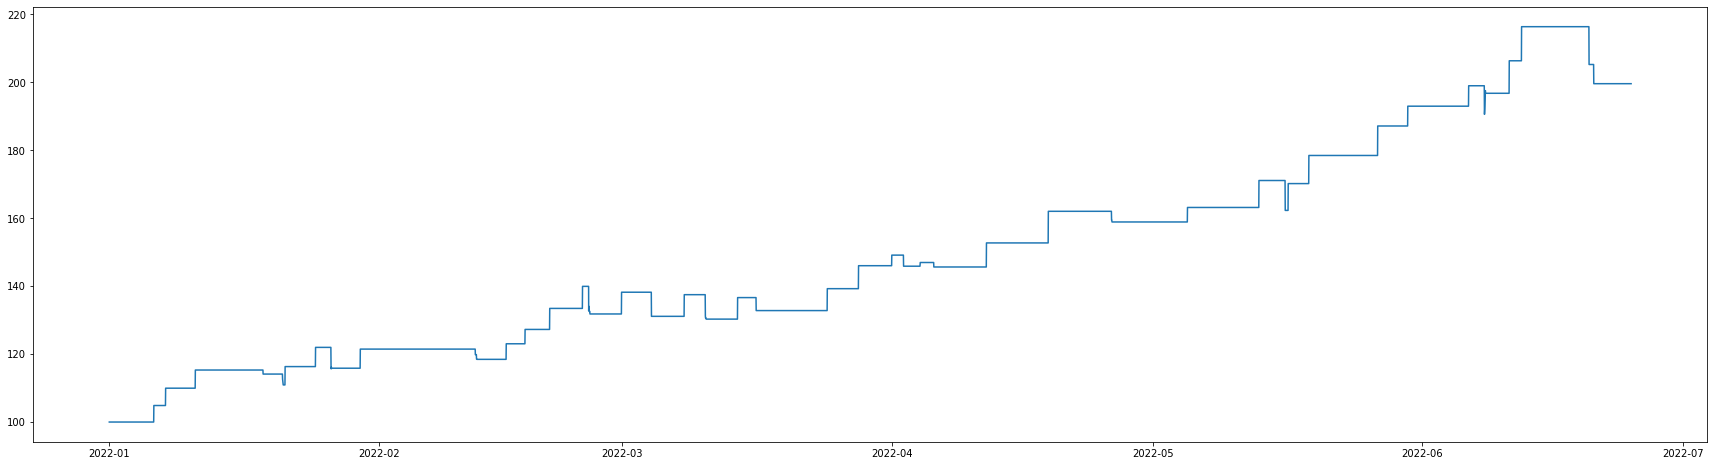

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 5.0%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 53.01%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

BTC-PERP win rate: 53.01%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       83.000000
mean         0.906545
std          2.928664
min         -5.147103
25%         -0.432435
50%          0.066055
75%          4.363054
max          6.099698


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution BTC-PERP:
       profit_percent
count       83.000000
mean         0.906545
std          2.928664
min         -5.147103
25%         -0.432435
50%          0.066055
75%          4.363054
max          6.099698


